# This workbook talks through the functionality of Kspar-Plag thermobarometry
- First, we consider analyses of touching Kspar-Plag pairs
- Then we consider the situation common in lavas where you have a lot of individual Plag-Kspar crystals, and you want to assess all possible combinations from a single sample or deposit

In [1]:
import numpy as np
import pandas as pd
import sys
sys.path.append("../..")
import matplotlib.pyplot as plt
import Thermobar as pt
pd.options.display.max_columns = None
import inspect
from functools import partial
import warnings as w
w.filterwarnings("ignore", message="rubicon.objc.ctypes_patch has only been tested ")
w.filterwarnings("ignore", message="The handle")

# Example 1- Touching Pairs pressure calculation
- Make an excel spreadsheet where you have rows for each touching pair, with the column headings SiO2_Kspar for SiO2 in the Kspar, SiO2_Plag for SiO2 in the Plag etc. The column order doesnt matter. 
- FeO is always as FeOt

### Loading in excel spreadsheet

In [2]:
out=pt.import_excel('Two_Feldspar_input.xlsx', sheet_name="Paired_Plag_Kspar")
# This extracts a dataframe of all inputs
my_input=out['my_input']
# This extracts a dataframe of kspar compositions from the dictionary "out"
Kspars=out['Kspars']
# This extracts a dataframe of plag compositions from the dictionary "out"
Plags=out['Plags']

C:\Users\penny\anaconda3\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


### check that your inputs have been read in properly, to do this, do "name".head() to look at the first few rows

In [3]:
Plags.head()

C:\Users\penny\anaconda3\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,SiO2_Plag,TiO2_Plag,Al2O3_Plag,FeOt_Plag,MnO_Plag,MgO_Plag,CaO_Plag,Na2O_Plag,K2O_Plag,Cr2O3_Plag,Sample_ID_Plag
0,56.3,0.0,31.4,0.31,0.0,0.05,14.60,2.70,0.71,0.0,0
1,60.5,0.0,24.8,0.07,0.0,0.00,5.92,7.36,1.42,0.0,1
2,57.8,0.0,26.7,0.08,0.0,0.00,8.06,6.08,1.13,0.0,2
3,46.2,0.0,33.5,0.31,0.0,0.00,17.40,1.22,0.30,0.0,3
4,50.3,0.0,31.1,0.54,0.0,0.06,14.50,2.76,0.79,0.0,4


In [4]:
Kspars.head()

C:\Users\penny\anaconda3\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,SiO2_Kspar,TiO2_Kspar,Al2O3_Kspar,FeOt_Kspar,MnO_Kspar,MgO_Kspar,CaO_Kspar,Na2O_Kspar,K2O_Kspar,Cr2O3_Kspar
0,65.0,0.0,19.1,0.11,0.0,0.03,0.51,2.02,13.40,0.0
1,65.5,0.0,19.6,0.07,0.0,0.00,0.75,4.81,9.36,0.0
2,65.4,0.0,19.4,0.05,0.0,0.00,0.59,3.13,11.50,0.0
3,64.6,0.0,18.8,0.09,0.0,0.00,0.39,1.15,14.80,0.0
4,61.8,0.0,19.2,0.51,0.0,0.03,0.66,1.71,12.90,0.0


#### If at any point you want to find out more about a function, and what equations it offers, you can use the help function

In [5]:
help(pt.calculate_plag_kspar_temp)

Help on function calculate_plag_kspar_temp in module Thermobar.feldspar:

calculate_plag_kspar_temp(*, plag_comps=None, kspar_comps=None, Two_Fspar_Match=None, equationT=None, P=None, eq_tests=False)
    Two feldspar thermometer (Kspar-Plag)
    Returns temperature in Kelvin
    
    Parameters
    -------
    
    plag_comps: DataFrame
        Plag compositions with column headings SiO2_Plag, MgO_Plag etc.
    
    kspar_comps: DataFrame
        Kspar compositions with column headings SiO2_Kspar, MgO_Kspar etc.
    
    or:
    Two_Fspar_Match: Pandas dataframe from mineral matching algorithm
    
    EquationT: str
        Equation choices:
            |   T_Put2008_eq27a (P-dependent, H2O-independent)
            |   T_Put2008_eq27b (P-dependent, H2O-independent)
            |   T_Put_Global_2Fspar (P-dependent, H2O-independent)
    
    
    P: float, int, series, str  ("Solve")
        Pressure in kbar
        Only needed for P-sensitive thermometers.
        If enter P="Solve", r

C:\Users\penny\anaconda3\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


#### You can also do help on the equations themselves to get a bit more information, 


In [6]:
help(pt.T_Put2008_eq27a)

Help on function T_Put2008_eq27a in module Thermobar.feldspar:

T_Put2008_eq27a(P, *, K_Barth, SiO2_Kspar_cat_frac, CaO_Kspar_cat_frac, An_Kspar, An_Plag, Ab_Plag)
    Two feldspar thermometer: Equation 27a of Putirka (2008).
    SEE±23°C for calibration
    SEE±44°C for test data



# Example 1 - Touching pairs Temperature calculation
- The function calculate_plag_kspar_temp calculates T in Kelvin using inputted Kspar, Plag compositions, a user-selected equation, and a pressure estimate. 

In [7]:
T_27a_5kbar=pt.calculate_plag_kspar_temp(plag_comps=Plags, kspar_comps=Kspars, equationT="T_Put2008_eq27a", P=5)
T_27a_5kbar

0     1217.161837
1     1185.776406
2     1185.985560
3     1175.572454
4     1181.625430
5     1072.579554
6     1091.766248
7     1069.683005
8     1001.263848
9     1000.902376
10     976.201858
11     982.963651
12    1003.496965
13    1027.369939
14     965.674231
15     920.878144
dtype: float64

## Can also specify a panda series of pressures for the original spreadsheet
- here, presure stored in a column in GPa, so need to multiply by 10  to get kbar for the function

In [8]:
T_27a_5kbar=pt.calculate_plag_kspar_temp(plag_comps=Plags, kspar_comps=Kspars, equationT="T_Put2008_eq27a", P=10*my_input['P_GPa'])
T_27a_5kbar

0     1262.750535
1     1228.315833
2     1326.793565
3     1217.144277
4     1223.769830
5     1105.033113
6     1203.232357
7     1261.838652
8     1242.319184
9     1027.699692
10    1001.179781
11    1008.433052
12    1030.489241
13    1056.190474
14     989.896820
15     942.020563
dtype: float64

## Can also specify Eq_Test=True, this calculates activities based on Elkins and Grove (1990), following the protocol in the supplementary spreadsheets of Putirka. 
- Note, Putirka (2008) don't give any values of equilibrium tests unlike Cpx-Opx, or Cpx-Liq etc. Instead, they say 
"As a test for equilibrium, one can compare the activities between those calculated for alkali and plagioclase feldspar, 
using the models of Elkins and Grove (1990) (columns AX – AZ). These should nominally be zero, but tests are required to 
determine whether this measure of equilibrium is effective at reducing error for T calculated using experimental data. 

In [9]:
T_27a_5kbar_EqTests=pt.calculate_plag_kspar_temp(plag_comps=Plags, kspar_comps=Kspars, equationT="T_Put2008_eq27a", P=10*my_input['P_GPa'], eq_tests=True)
T_27a_5kbar_EqTests

got to Kwargs


,T_K_calc,Delta_An,Delta_Ab,Delta_Or,a_Ab_plg,a_An_plg,a_Or_plg,a_Ab_kspar,a_An_kspar,a_Or_kspar
0,1262.750535,0.045987,0.187872,0.208913,0.582154,0.919522,1.024046,0.394282,0.873535,0.815133
1,1228.315833,0.248834,-0.042074,-0.075490,0.653809,0.839507,0.602659,0.695883,0.590672,0.678149
2,1326.793565,0.412296,-0.015576,-0.233532,0.610283,0.861556,0.516050,0.625859,0.449261,0.749582
3,1217.144277,-0.125097,0.344129,0.379772,0.600615,0.925594,1.265507,0.256487,1.050691,0.885735
4,1223.769830,-0.442938,0.223217,0.445615,0.589090,0.932291,1.275140,0.365873,1.375229,0.829525
5,1105.033113,0.002903,0.026260,0.090290,0.653643,0.957272,0.870736,0.627383,0.954369,0.780446
6,1203.232357,0.385999,-0.003815,-0.114857,0.640491,0.901033,0.685085,0.644306,0.515034,0.799941
7,1261.838652,0.574686,-0.066414,-0.218774,0.638589,0.860356,0.599967,0.705003,0.285671,0.818741
8,1242.319184,0.475756,-0.310245,-0.069409,0.751454,0.582698,0.730930,1.061699,0.106942,0.800339
9,1027.699692,0.146406,-0.046573,-0.018528,0.774057,0.680166,0.734628,0.820630,0.533760,0.753156


# Example 4 - Combining all possible Plag-Kspar Pairs
- Say you don't have touching Plag-Kspar pairs, but instead a list of Kspar compositions you have measured on the probe in one sheet of an excel spreadsheet, and a set of Plag compositions in another sheet


In [10]:
T_27a_5kbar_All=pt.calculate_plag_kspar_temp_matching(plag_comps=Plags, kspar_comps=Kspars, equationT="T_Put2008_eq27a", P=10)
T_27a_5kbar_All

C:\Users\penny\anaconda3\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Considering 256 Kspar-Plag pairs, be patient if this is >>1 million!
got to Kwargs


,Delta_An,Delta_Ab,Delta_Or,a_Ab_plg,a_An_plg,a_Or_plg,a_Ab_kspar,a_An_kspar,a_Or_kspar,T_K_calc,SiO2_Kspar,TiO2_Kspar,Al2O3_Kspar,FeOt_Kspar,MnO_Kspar,MgO_Kspar,CaO_Kspar,Na2O_Kspar,K2O_Kspar,Cr2O3_Kspar,SiO2_Kspar_cat_prop,MgO_Kspar_cat_prop,FeOt_Kspar_cat_prop,CaO_Kspar_cat_prop,Al2O3_Kspar_cat_prop,Na2O_Kspar_cat_prop,K2O_Kspar_cat_prop,MnO_Kspar_cat_prop,TiO2_Kspar_cat_prop,Cr2O3_Kspar_cat_prop,sum,SiO2_Kspar_cat_frac,MgO_Kspar_cat_frac,FeOt_Kspar_cat_frac,CaO_Kspar_cat_frac,Al2O3_Kspar_cat_frac,Na2O_Kspar_cat_frac,K2O_Kspar_cat_frac,MnO_Kspar_cat_frac,TiO2_Kspar_cat_frac,Cr2O3_Kspar_cat_frac,An_Kspar,Ab_Kspar,Or_Kspar,ID_Kspar,Sample_ID_Kspar,SiO2_Plag,TiO2_Plag,Al2O3_Plag,FeOt_Plag,MnO_Plag,MgO_Plag,CaO_Plag,Na2O_Plag,K2O_Plag,Cr2O3_Plag,Sample_ID_Plag,SiO2_Plag_cat_prop,MgO_Plag_cat_prop,FeOt_Plag_cat_prop,CaO_Plag_cat_prop,Al2O3_Plag_cat_prop,Na2O_Plag_cat_prop,K2O_Plag_cat_prop,MnO_Plag_cat_prop,TiO2_Plag_cat_prop,Cr2O3_Plag_cat_prop,sum,SiO2_Plag_cat_frac,MgO_Plag_cat_frac,FeOt_Plag_cat_frac,CaO_Plag_cat_frac,Al2O3_Plag_cat_frac,Na2O_Plag_cat_frac,K2O_Plag_cat_frac,MnO_Plag_cat_frac,TiO2_Plag_cat_frac,Cr2O3_Plag_cat_frac,An_Plag,Ab_Plag,Or_Plag,ID_Plag,K_Barth,T,P
0,0.045987,0.187872,0.208913,0.582154,0.919522,1.024046,0.394282,0.873535,0.815133,1262.750535,65.0,0.0,19.1,0.11,0.0,0.03,0.51,2.02,13.40,0.0,1.081813,0.000744,0.001531,0.009095,0.374653,0.065183,0.284513,0.0,0.0,0.0,1.817533,0.595210,0.000410,0.000842,0.005004,0.206133,0.035864,0.156538,0.0,0.0,0.0,0.025348,0.181675,0.792977,0.0,0.0,56.3,0.0,31.4,0.31,0.0,0.05,14.6,2.7,0.71,0.0,0,0.937017,0.001241,0.004315,0.260354,0.615922,0.087126,0.015075,0.0,0.0,0.0,1.92105,0.487763,0.000646,0.002246,0.135527,0.320617,0.045354,0.007847,0.0,0.0,0.0,0.718109,0.240312,0.04158,0,0.755998,1262.750535,10
1,0.561520,-0.103945,-0.187520,0.506036,0.871120,0.431966,0.609981,0.309600,0.619486,1498.868408,65.5,0.0,19.6,0.07,0.0,0.00,0.75,4.81,9.36,0.0,1.090135,0.000000,0.000974,0.013374,0.384461,0.155214,0.198735,0.0,0.0,0.0,1.842893,0.591535,0.000000,0.000529,0.007257,0.208618,0.084223,0.107838,0.0,0.0,0.0,0.036410,0.422555,0.541035,1.0,1.0,56.3,0.0,31.4,0.31,0.0,0.05,14.6,2.7,0.71,0.0,0,0.937017,0.001241,0.004315,0.260354,0.615922,0.087126,0.015075,0.0,0.0,0.0,1.92105,0.487763,0.000646,0.002246,0.135527,0.320617,0.045354,0.007847,0.0,0.0,0.0,0.718109,0.240312,0.04158,0,1.758361,1498.868408,10
2,0.401306,0.038584,-0.110012,0.536062,0.890715,0.616106,0.497478,0.489408,0.726118,1391.811767,65.4,0.0,19.4,0.05,0.0,0.00,0.59,3.13,11.50,0.0,1.088471,0.000000,0.000696,0.010521,0.380538,0.101002,0.244172,0.0,0.0,0.0,1.825399,0.596292,0.000000,0.000381,0.005764,0.208468,0.055332,0.133763,0.0,0.0,0.0,0.029579,0.283957,0.686464,2.0,2.0,56.3,0.0,31.4,0.31,0.0,0.05,14.6,2.7,0.71,0.0,0,0.937017,0.001241,0.004315,0.260354,0.615922,0.087126,0.015075,0.0,0.0,0.0,1.92105,0.487763,0.000646,0.002246,0.135527,0.320617,0.045354,0.007847,0.0,0.0,0.0,0.718109,0.240312,0.04158,0,1.18162,1391.811767,10
3,-0.592618,0.351296,1.033359,0.644757,0.956488,1.921153,0.293461,1.549106,0.887795,1132.690353,64.6,0.0,18.8,0.09,0.0,0.00,0.39,1.15,14.80,0.0,1.075156,0.000000,0.001253,0.006955,0.368768,0.037109,0.314238,0.0,0.0,0.0,1.803480,0.596156,0.000000,0.000695,0.003856,0.204476,0.020577,0.174240,0.0,0.0,0.0,0.019410,0.103570,0.877020,3.0,3.0,56.3,0.0,31.4,0.31,0.0,0.05,14.6,2.7,0.71,0.0,0,0.937017,0.001241,0.004315,0.260354,0.615922,0.087126,0.015075,0.0,0.0,0.0,1.92105,0.487763,0.000646,0.002246,0.135527,0.320617,0.045354,0.007847,0.0,0.0,0.0,0.718109,0.240312,0.04158,0,0.430982,1132.690353,10
4,-0.430839,0.233036,0.373851,0.597593,0.928857,1.203211,0.364557,1.359696,0.829361,1226.655644,61.8,0.0,19.2,0.51,0.0,0.03,0.66,1.71,12.90,0.0,1.028555,0.000744,0.007098,0.011769,0.376615,0.055180,0.273897,0.0,0.0,0.0,1.753859,0.586453,0.000424,0.004047,0.006711,0.214735,0.031462,0.156168,0.0,0.0,0.0,0.034530,0.161891,0.803579,4.0,4.0,56.3,0.0,31.4,0.31,0.0,0.05,14.6,2.7,0.71,0.0,0,0.937017,0.001241,0.004315,0.260354,0.

### As it is currently unclear what delta values are acceptable, we leave it up to the users to investigate the experimental data, but provide an example here of how you can filter based on these values

C:\Users\penny\anaconda3\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Text(0.5, 0, 'Delta Or')

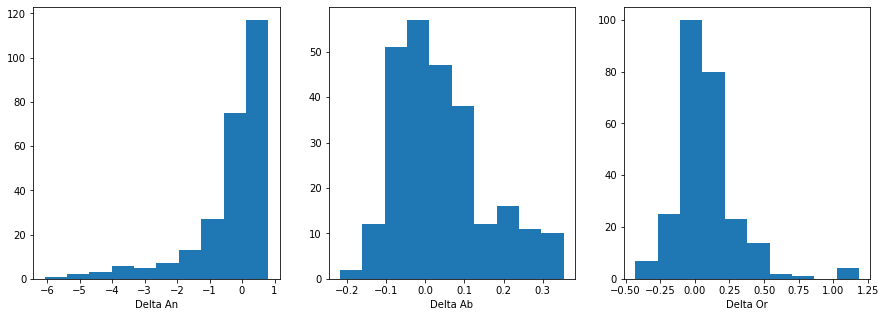

In [11]:
fig, ((ax0, ax1, ax2)) = plt.subplots(1,3, figsize = (15,5)) # adjust dimensions of figure here
ax0.hist(T_27a_5kbar_All['Delta_An'])
ax1.hist(T_27a_5kbar_All['Delta_Ab'])
ax2.hist(T_27a_5kbar_All['Delta_Or'])
ax0.set_xlabel('Delta An')
ax1.set_xlabel('Delta Ab')
ax2.set_xlabel('Delta Or')

In [13]:
filt_a_An=abs(T_27a_5kbar_All['Delta_An'])<1 # This says accept pairs within Delta An between +-1
filt_a_Ab=abs(T_27a_5kbar_All['Delta_Ab'])<0.15 # This says accept pairs with Delta Ab between +-0.15
filt_a_Or=abs(T_27a_5kbar_All['Delta_Or'])<0.2 # This says accept pairs with Delta Or between +-0.2
Filt_pairs=T_27a_5kbar_All.loc[filt_a_An&filt_a_Ab&filt_a_Or] # This filters pairs to only those meeting these three criteria
Filt_pairs

C:\Users\penny\anaconda3\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,Delta_An,Delta_Ab,Delta_Or,a_Ab_plg,a_An_plg,a_Or_plg,a_Ab_kspar,a_An_kspar,a_Or_kspar,T_K_calc,SiO2_Kspar,TiO2_Kspar,Al2O3_Kspar,FeOt_Kspar,MnO_Kspar,MgO_Kspar,CaO_Kspar,Na2O_Kspar,K2O_Kspar,Cr2O3_Kspar,SiO2_Kspar_cat_prop,MgO_Kspar_cat_prop,FeOt_Kspar_cat_prop,CaO_Kspar_cat_prop,Al2O3_Kspar_cat_prop,Na2O_Kspar_cat_prop,K2O_Kspar_cat_prop,MnO_Kspar_cat_prop,TiO2_Kspar_cat_prop,Cr2O3_Kspar_cat_prop,sum,SiO2_Kspar_cat_frac,MgO_Kspar_cat_frac,FeOt_Kspar_cat_frac,CaO_Kspar_cat_frac,Al2O3_Kspar_cat_frac,Na2O_Kspar_cat_frac,K2O_Kspar_cat_frac,MnO_Kspar_cat_frac,TiO2_Kspar_cat_frac,Cr2O3_Kspar_cat_frac,An_Kspar,Ab_Kspar,Or_Kspar,ID_Kspar,Sample_ID_Kspar,SiO2_Plag,TiO2_Plag,Al2O3_Plag,FeOt_Plag,MnO_Plag,MgO_Plag,CaO_Plag,Na2O_Plag,K2O_Plag,Cr2O3_Plag,Sample_ID_Plag,SiO2_Plag_cat_prop,MgO_Plag_cat_prop,FeOt_Plag_cat_prop,CaO_Plag_cat_prop,Al2O3_Plag_cat_prop,Na2O_Plag_cat_prop,K2O_Plag_cat_prop,MnO_Plag_cat_prop,TiO2_Plag_cat_prop,Cr2O3_Plag_cat_prop,sum,SiO2_Plag_cat_frac,MgO_Plag_cat_frac,FeOt_Plag_cat_frac,CaO_Plag_cat_frac,Al2O3_Plag_cat_frac,Na2O_Plag_cat_frac,K2O_Plag_cat_frac,MnO_Plag_cat_frac,TiO2_Plag_cat_frac,Cr2O3_Plag_cat_frac,An_Plag,Ab_Plag,Or_Plag,ID_Plag,K_Barth,T,P
1,0.561520,-0.103945,-0.187520,0.506036,0.871120,0.431966,0.609981,0.309600,0.619486,1498.868408,65.5,0.0,19.6,0.07,0.0,0.00,0.75,4.81,9.36,0.0,1.090135,0.000000,0.000974,0.013374,0.384461,0.155214,0.198735,0.0,0.0,0.0,1.842893,0.591535,0.000000,0.000529,0.007257,0.208618,0.084223,0.107838,0.0,0.0,0.0,0.036410,0.422555,0.541035,1.0,1.0,56.3,0.0,31.4,0.31,0.0,0.05,14.6,2.7,0.71,0.0,0,0.937017,0.001241,0.004315,0.260354,0.615922,0.087126,0.015075,0.0,0.0,0.0,1.92105,0.487763,0.000646,0.002246,0.135527,0.320617,0.045354,0.007847,0.0,0.0,0.0,0.718109,0.240312,0.04158,0,1.758361,1498.868408,10
2,0.401306,0.038584,-0.110012,0.536062,0.890715,0.616106,0.497478,0.489408,0.726118,1391.811767,65.4,0.0,19.4,0.05,0.0,0.00,0.59,3.13,11.50,0.0,1.088471,0.000000,0.000696,0.010521,0.380538,0.101002,0.244172,0.0,0.0,0.0,1.825399,0.596292,0.000000,0.000381,0.005764,0.208468,0.055332,0.133763,0.0,0.0,0.0,0.029579,0.283957,0.686464,2.0,2.0,56.3,0.0,31.4,0.31,0.0,0.05,14.6,2.7,0.71,0.0,0,0.937017,0.001241,0.004315,0.260354,0.615922,0.087126,0.015075,0.0,0.0,0.0,1.92105,0.487763,0.000646,0.002246,0.135527,0.320617,0.045354,0.007847,0.0,0.0,0.0,0.718109,0.240312,0.04158,0,1.18162,1391.811767,10
5,0.479026,0.063996,0.061497,0.561602,0.906857,0.820670,0.497606,0.427831,0.759173,1315.920615,65.1,0.0,19.2,0.05,0.0,0.00,0.36,2.87,12.60,0.0,1.083478,0.000000,0.000696,0.006420,0.376615,0.092612,0.267527,0.0,0.0,0.0,1.827347,0.592924,0.000000,0.000381,0.003513,0.206099,0.050681,0.146402,0.0,0.0,0.0,0.017513,0.252653,0.729834,5.0,5.0,56.3,0.0,31.4,0.31,0.0,0.05,14.6,2.7,0.71,0.0,0,0.937017,0.001241,0.004315,0.260354,0.615922,0.087126,0.015075,0.0,0.0,0.0,1.92105,0.487763,0.000646,0.002246,0.135527,0.320617,0.045354,0.007847,0.0,0.0,0.0,0.718109,0.240312,0.04158,0,1.051354,1315.920615,10
6,0.412446,0.104466,0.124802,0.570741,0.912524,0.906470,0.466276,0.500077,0.781668,1291.496266,65.0,0.0,19.2,0.00,0.0,0.00,0.35,2.51,12.80,0.0,1.081813,0.000000,0.000000,0.006241,0.376615,0.080995,0.271774,0.0,0.0,0.0,1.817438,0.595241,0.000000,0.000000,0.003434,0.207223,0.044566,0.149537,0.0,0.0,0.0,0.017385,0.225607,0.757008,6.0,6.0,56.3,0.0,31.4,0.31,0.0,0.05,14.6,2.7,0.71,0.0,0,0.937017,0.001241,0.004315,0.260354,0.615922,0.087126,0.015075,0.0,0.0,0.0,1.92105,0.487763,0.000646,0.002246,0.135527,0.320617,0.045354,0.007847,0.0,0.0,0.0,0.718109,0.240312,0.04158,0,0.93881,1291.496266,10
9,0.723122,-0.056236,0.170397,0.567845,0.910734,0.878500,0.624081,0.187611,0.708103,1299.096322,66.0,0.0,18.9,0.05,0.0,0.00,0.18,3.73,11.30,0.0,1.098457,0.000000,0.000696,0.003210,0.370730,0.120364,0.239925,0.0,0.0,0.0,1.833381,0.599143,0.000000,0.000380,0.001751,0.202211,0.065651,0.130865,0.0,0.0,0.0,0.008830,0.331125,0.660044,9.0,9.0,56.3,0.0,31.4,0.31,0.0,0.05,14.6,2.7,0.71,0.0,0,0.937017,0.001241,0.004315,0.260354,0.61